In [ ]:
import numpy as np 
import os #đọc địa chỉ hình ảnh 
from PIL import Image #xử lý hình ảnh

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
#liên kết drive với colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#tạo địa chỉ file ảnh
train_data= 'drive/MyDrive/BTVN1/train'
test_data= 'drive/MyDrive/BTVN1/test'

In [ ]:
listdata_train=[]
listdata_test=[]
dict={'tobi':[0,1],'cat':[1,0]}

In [ ]:
#đọc dữ liệu hình ảnh 
def Getdata(dirdata,lstdata):
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[4]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(43):
      np.random.shuffle(lstdata)
  return lstdata

In [ ]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)

In [ ]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])

y_train.shape


(62, 150, 150, 3)

In [ ]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])
x_test.shape

(62, 150, 150, 3)

In [ ]:
yname=y_train.flatten()

In [ ]:
class_names=['Mèo','Tobi']
x_pre=x_test
y_pre=y_test
#y_pre

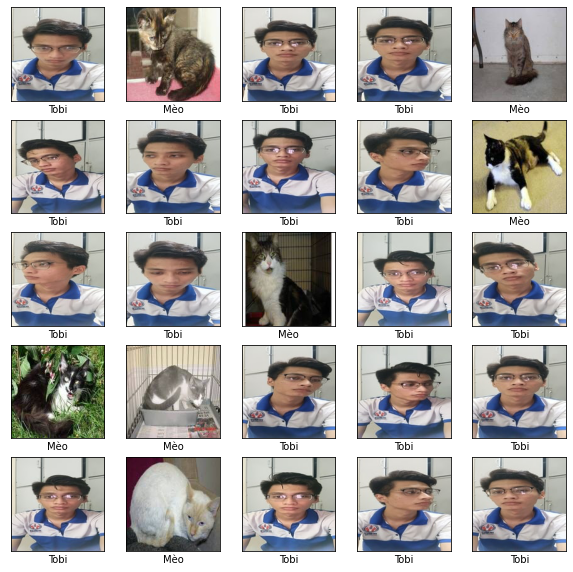

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [ ]:
from keras.utils import np_utils
x_train=x_train.reshape(62,67500)
x_test=x_test.reshape(62,67500)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
model=Sequential()
model.add(Dense(1000,activation='relu',input_shape=(67500,)))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              67501000  
                                                                 
 dense_13 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_14 (Dense)            (None, 2)                 2002      
                                                                 
Total params: 68,504,002
Trainable params: 68,504,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=90,epochs=200,verbose=1)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.6374 - accuracy: 0.6774
Epoch 2/200
1/1 [==============================] - 0s 51ms/step - loss: 205.6299 - accuracy: 0.3226
Epoch 3/200
1/1 [==============================] - 0s 46ms/step - loss: 1326.7782 - accuracy: 0.6774
Epoch 4/200
1/1 [==============================] - 0s 48ms/step - loss: 440.2191 - accuracy: 0.6774
Epoch 5/200
1/1 [==============================] - 0s 49ms/step - loss: 94.8890 - accuracy: 0.6774
Epoch 6/200
1/1 [==============================] - 0s 45ms/step - loss: 198.5446 - accuracy: 0.3226
Epoch 7/200
1/1 [==============================] - 0s 42ms/step - loss: 182.8173 - accuracy: 0.6774
Epoch 8/200
1/1 [==============================] - 0s 40ms/step - loss: 44.2423 - accuracy: 0.6935
Epoch 9/200
1/1 [==============================] - 0s 40ms/step - loss: 1.3923 - accuracy: 0.9677
Epoch 10/200
1/1 [==============================] - 0s 44ms/step - loss: 4.3563e-06 - accuracy: 1.0000
Epoc

In [ ]:
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.0
Test accuary 1.0


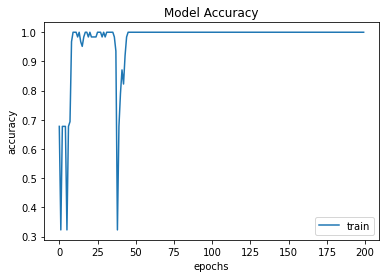

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'])
plt.show()

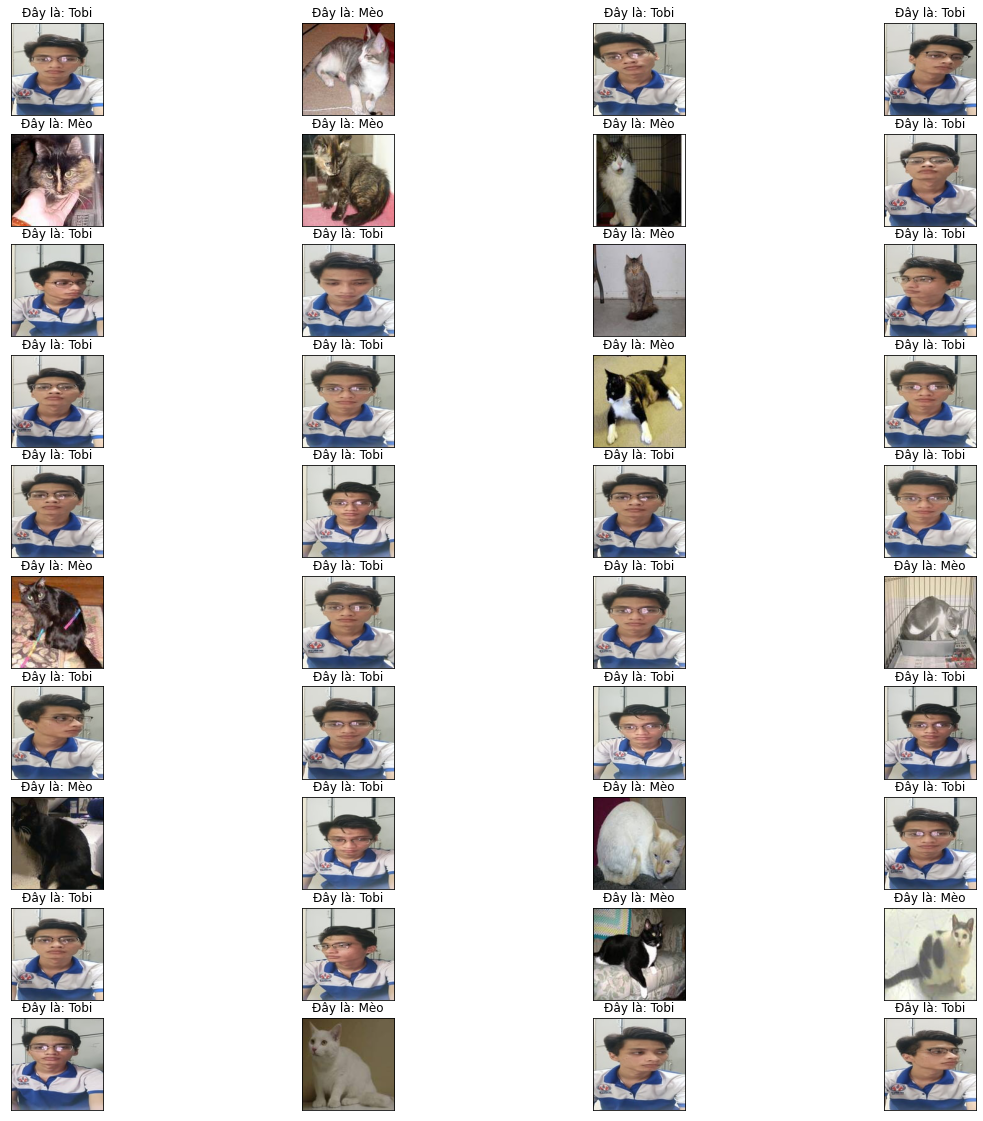

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("Đây là: " + str(class_names[np.argmax(model.predict(x_pre[i].reshape((-1,67500))))]))
plt.show()